# Mhammed Alzaid 

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pylab

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)

sns.set_style("whitegrid");

In [2]:
df = pd.read_csv("Car_details_v3.csv")
df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
df.shape

(8128, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df['name'].value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [6]:

dd1 = []
for row, sentence in enumerate(df['name']):
    if sentence.split(' ')[0] == 'Land':
        dd1.append(' '.join(sentence.split(' ')[0:2]))
    elif sentence.split(' ')[0] == 'OpelCorsa':
        dd1.append('Opel')
    elif sentence.split(' ')[0] == 'ISUZU':
        dd1.append('Isuzu')
    else:
        dd1.append(sentence.split(' ')[0])
df['cars'] = dd1
del dd1

In [7]:
df['cars'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land Rover          6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: cars, dtype: int64

In [8]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cars
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata


### the function is to created a new variable called as “cars”  from the "name" column 

### Delete all the null val

In [9]:
df = df.dropna(how='any',axis=0)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cars
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
 13  cars           7906 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 926.5+ KB


##### The data showing mixed between string and integer 

In [11]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
cars             0
dtype: int64

In [12]:
df['fuel'].describe()

count       7906
unique         4
top       Diesel
freq        4299
Name: fuel, dtype: object

In [13]:
df.isnull().sum().sort_values(ascending=False)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
cars             0
dtype: int64

In [14]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

### removes 'CC' units from engine variable and change to float

In [15]:
def eng_clean(engine):
    if isinstance(engine, str):
        return float(engine.replace('CC', '').strip())
    else:
        return np.nan
#df.loc[:,'engine'] = df['engine'].apply(eng_clean)
df['engine'] = df['engine'].apply(eng_clean)


In [16]:
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 7906, dtype: float64

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cars
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


### removes 'bhp' units from max_power variable to float

In [18]:
def pow_clean(power):
    if isinstance(power, str):
        if power.replace('bhp', '').strip() != 'null':
            return float(power.replace('bhp', '').strip())
        elif power.replace('bhp', '').strip() == 'null':
            return np.nan
    else:
        return np.nan
df['max_power'] = df['max_power'].apply(pow_clean)

In [19]:
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 7906, dtype: float64

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cars
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


### removes 'kmpl' units in mileage wich is Kilometers Per Litre (fuel economy measurement)

In [21]:
def con_mileage(mileage):
    if isinstance(mileage, str):
        if mileage.endswith('g'):
            con = 0.7 
            return float(mileage.replace('km/kg', '').strip()) * con
        else:
            con = 1
            return float(mileage.replace('kmpl', '').strip()) * con
    else:
        return np.nan

df['mileage'] = df['mileage'].apply(con_mileage)

In [22]:
df['mileage'] 

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 7906, dtype: float64

### Dropping variable that will not be used in this analysis such as 'torque' and name

In [23]:
df.drop(['name','torque'], axis=1, inplace=True)

In [24]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'cars'],
      dtype='object')

### move the selling at the last

In [25]:
df = df[["year", "km_driven", "fuel", "seller_type", "transmission", "owner", "mileage", "engine", "max_power", "seats", "cars", "selling_price"]]
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,cars,selling_price
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,450000
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,370000
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,158000
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,225000
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,130000


<function matplotlib.pyplot.show(close=None, block=None)>

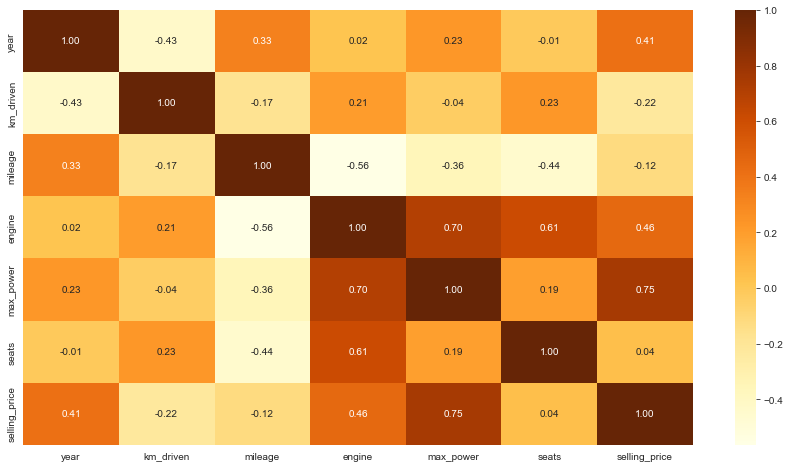

In [26]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'YlOrBr',)
plt.show

In [27]:
df['seats'].describe()

count    7906.000000
mean        5.416393
std         0.959208
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [28]:
df['seller_type'].describe()

count           7906
unique             3
top       Individual
freq            6563
Name: seller_type, dtype: object

In [29]:
df['transmission'].describe()

count       7906
unique         2
top       Manual
freq        6865
Name: transmission, dtype: object

In [30]:
df['owner'].describe()

count            7906
unique              5
top       First Owner
freq             5215
Name: owner, dtype: object

In [31]:
df['cars'].describe()

count       7906
unique        31
top       Maruti
freq        2367
Name: cars, dtype: object

### Leading and trailing whitespaces are removed


In [32]:
def str_split(string):
    return string.strip()
df['fuel'] = df['fuel'].apply(str_split)
df['transmission'] = df['transmission'].apply(str_split)
df['owner'] = df['owner'].apply(str_split)
df['seller_type'] = df['seller_type'].apply(str_split)


In [33]:
cars = np.unique(df['cars'], return_counts=True)
fuel = np.unique(df['fuel'], return_counts=True)
transmission = np.unique(df['transmission'], return_counts=True)
owner = np.unique(df['owner'], return_counts=True)


### EDA

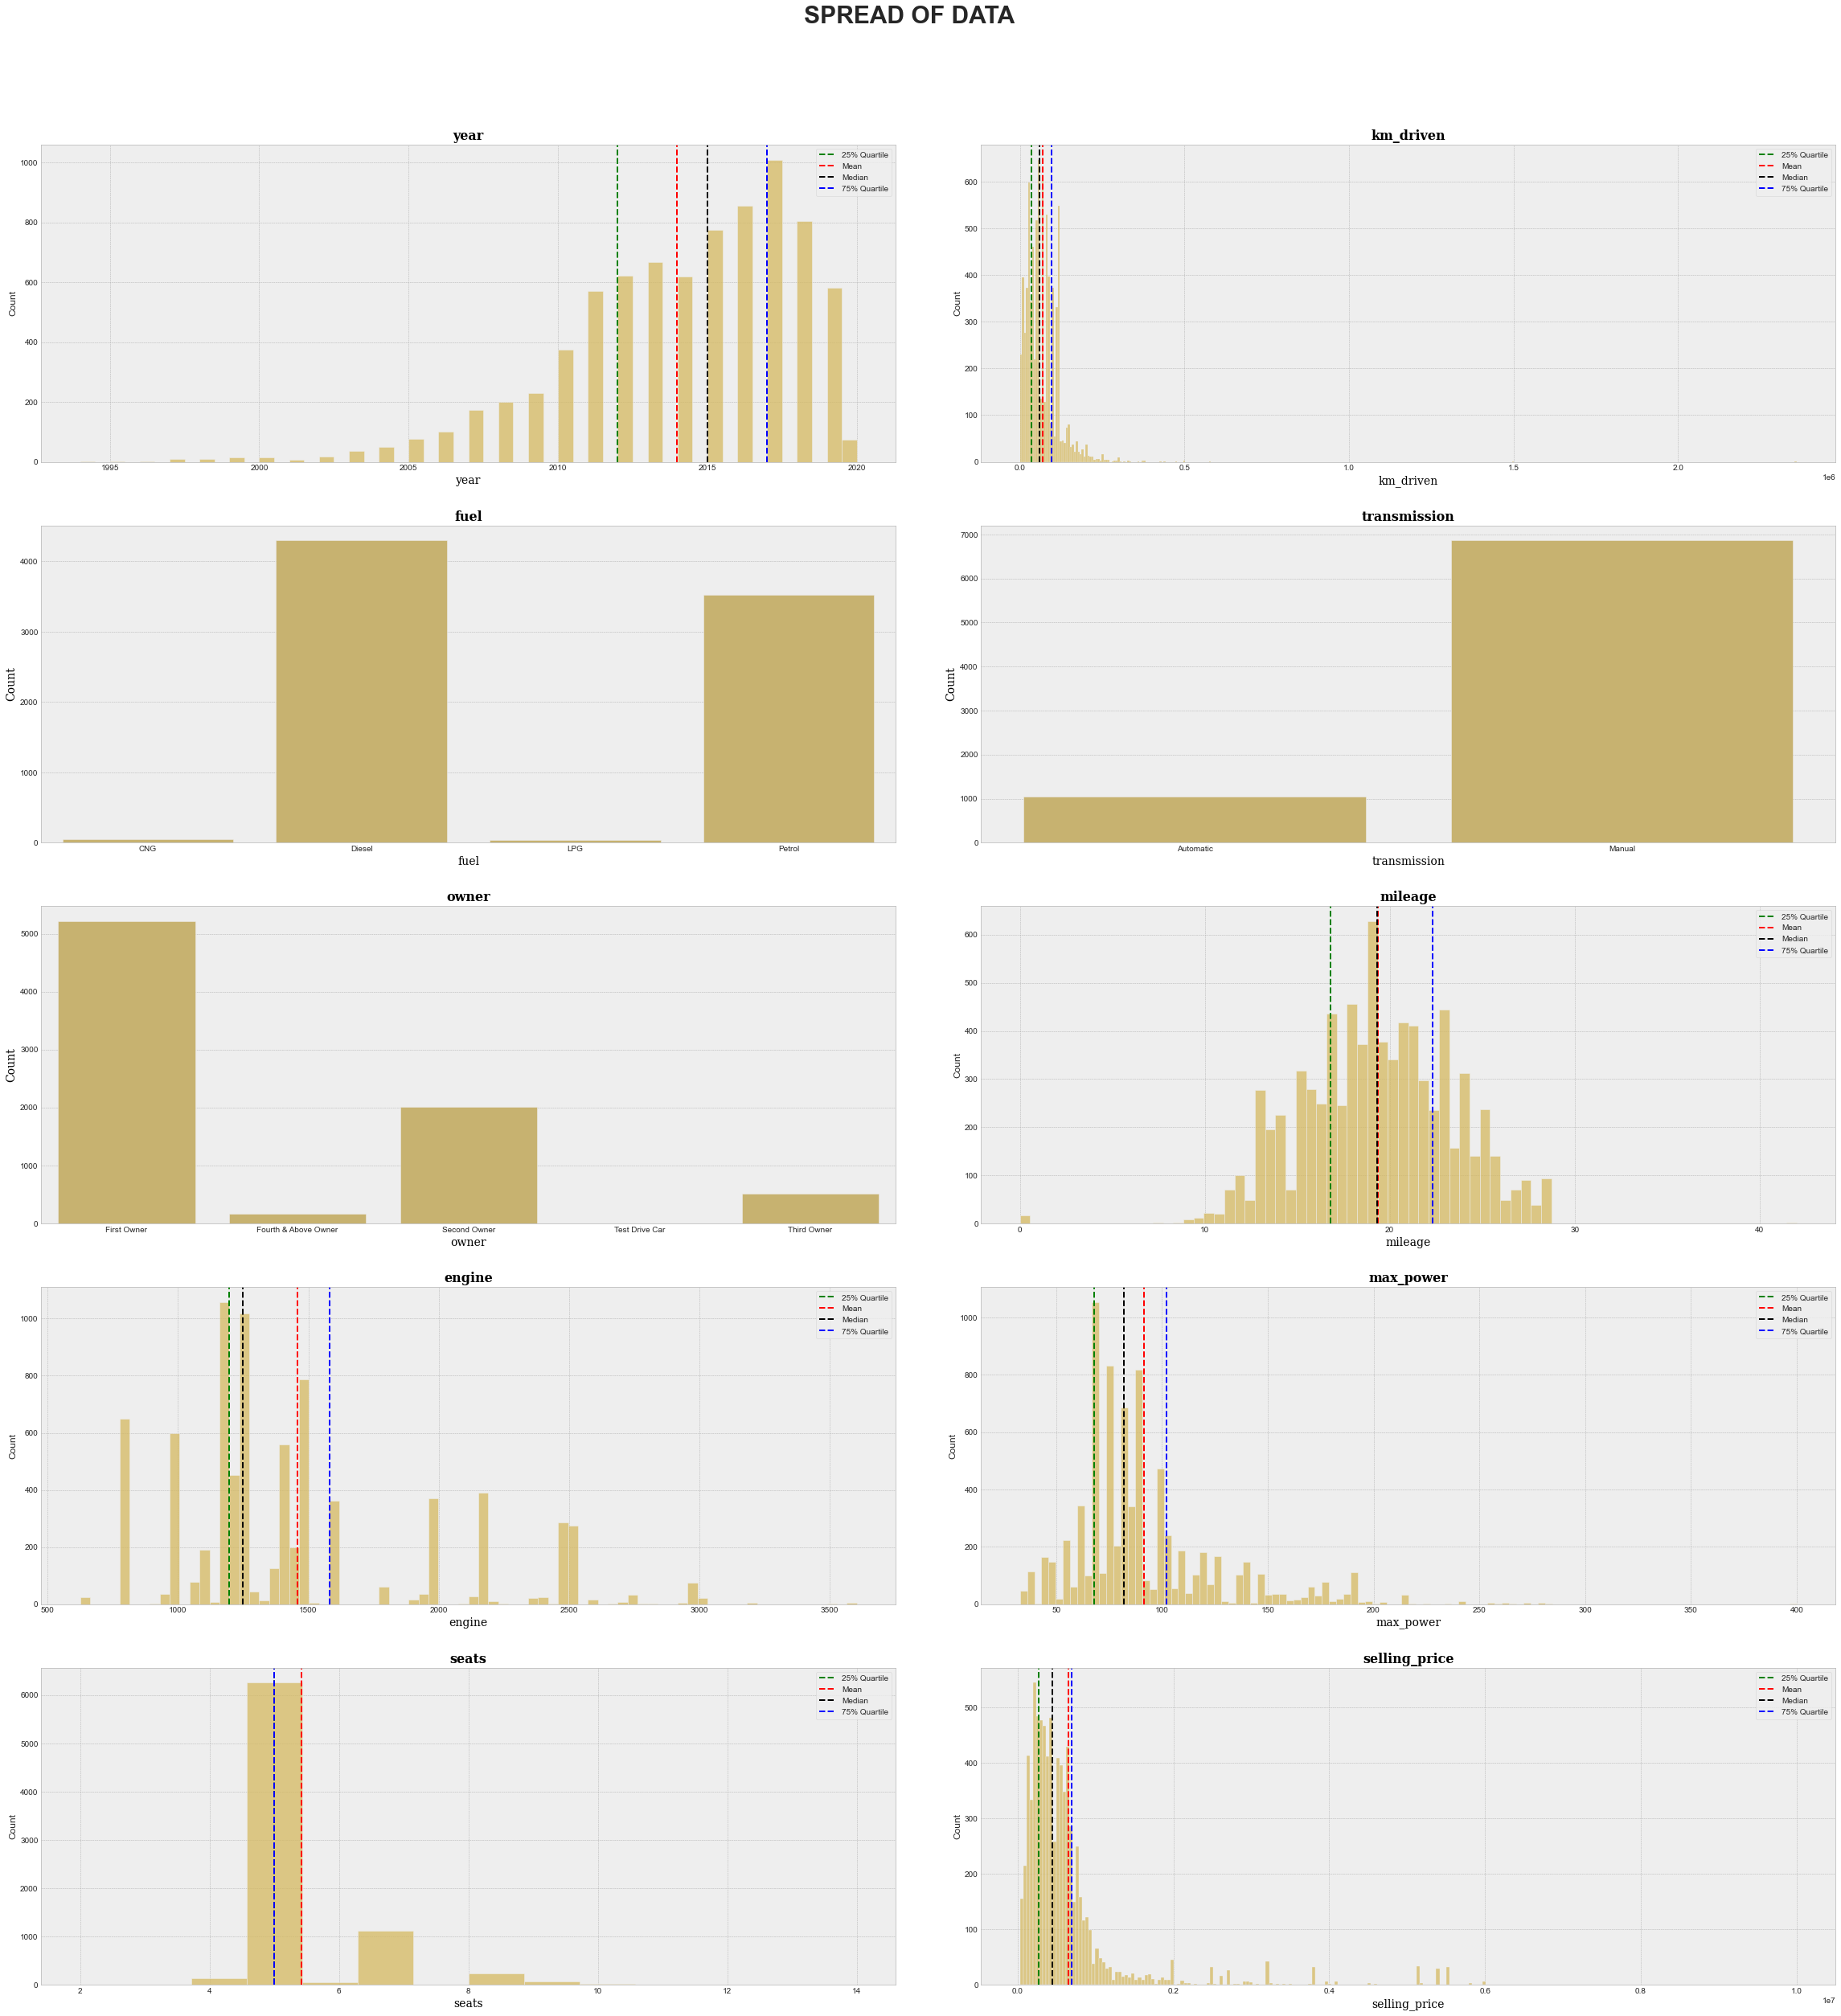

In [34]:
axtitle_dict = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16
        }

axlab_dict = {'family': 'serif',
              'color': 'black',
              'size': 14
              }


fig = plt.figure(figsize=[40,40]);
fig.suptitle("SPREAD OF DATA", fontsize=30, fontweight='bold');
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.2, wspace=0.1);



plt.style.use("bmh")

ax0 = fig.add_subplot(5, 2, 1);
sns.histplot(df['year'], ax=ax0, color='#d5b961');
ax0.axvline(df['year'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax0.axvline(df['year'].mean(),color='red',linestyle='--',label='Mean');
ax0.axvline(df['year'].median(),color='black',linestyle='--',label='Median');
ax0.axvline(df['year'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax0.set_title('year', fontdict=axtitle_dict);
ax0.set_xlabel('year', fontdict=axlab_dict);
ax0.legend(fontsize=10);


ax1 = fig.add_subplot(5, 2, 2);
sns.histplot(df['km_driven'], ax=ax1, color='#d5b961');
ax1.axvline(df['km_driven'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax1.axvline(df['km_driven'].mean(),color='red',linestyle='--',label='Mean');
ax1.axvline(df['km_driven'].median(),color='black',linestyle='--',label='Median');
ax1.axvline(df['km_driven'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax1.set_title('km_driven', fontdict=axtitle_dict);
ax1.set_xlabel('km_driven', fontdict=axlab_dict);
ax1.legend(fontsize=10);


ax2 = fig.add_subplot(5, 2, 3);
sns.barplot(x=list(fuel[0]), y=list(fuel[1]), ax=ax2, color='#d5b961');

ax2.set_title('fuel', fontdict=axtitle_dict);
ax2.set_xlabel('fuel', fontdict=axlab_dict);
ax2.set_ylabel('Count', fontdict=axlab_dict);



ax3 = fig.add_subplot(5, 2, 4);
sns.barplot(x=list(transmission[0]), y=list(transmission[1]), ax=ax3, color='#d5b961');

ax3.set_title('transmission', fontdict=axtitle_dict);
ax3.set_xlabel('transmission', fontdict=axlab_dict);
ax3.set_ylabel('Count', fontdict=axlab_dict);

ax4 = fig.add_subplot(5, 2, 5);
sns.barplot(x=list(owner[0]), y=list(owner[1]), ax=ax4, color='#d5b961');

ax4.set_title('owner', fontdict=axtitle_dict);
ax4.set_xlabel('owner', fontdict=axlab_dict);
ax4.set_ylabel('Count', fontdict=axlab_dict);

ax5 = fig.add_subplot(5, 2, 6);

sns.histplot(df['mileage'], ax=ax5, color='#d5b961', );
ax5.axvline(df['mileage'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax5.axvline(df['mileage'].mean(),color='red',linestyle='--',label='Mean');
ax5.axvline(df['mileage'].median(),color='black',linestyle='--',label='Median');
ax5.axvline(df['mileage'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax5.set_title('mileage', fontdict=axtitle_dict);
ax5.set_xlabel('mileage', fontdict=axlab_dict);
ax5.legend(fontsize=10);



ax6 = fig.add_subplot(5, 2, 7)
sns.histplot(df['engine'], ax=ax6, color='#d5b961');
ax6.axvline(df['engine'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax6.axvline(df['engine'].mean(),color='red',linestyle='--',label='Mean');
ax6.axvline(df['engine'].median(),color='black',linestyle='--',label='Median');
ax6.axvline(df['engine'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax6.set_title('engine', fontdict=axtitle_dict);
ax6.set_xlabel('engine', fontdict=axlab_dict);
ax6.legend(fontsize=10);

ax7 = fig.add_subplot(5, 2, 8)
sns.histplot(df['max_power'], ax=ax7, color='#d5b961');
ax7.axvline(df['max_power'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax7.axvline(df['max_power'].mean(),color='red',linestyle='--',label='Mean');
ax7.axvline(df['max_power'].median(),color='black',linestyle='--',label='Median');
ax7.axvline(df['max_power'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax7.set_title('max_power', fontdict=axtitle_dict);
ax7.set_xlabel('max_power', fontdict=axlab_dict);
ax7.legend(fontsize=10);

ax8 = fig.add_subplot(5, 2, 9)
sns.histplot(df['seats'], ax=ax8, color='#d5b961');
ax8.axvline(df['seats'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax8.axvline(df['seats'].mean(),color='red',linestyle='--',label='Mean');
ax8.axvline(df['seats'].median(),color='black',linestyle='--',label='Median');
ax8.axvline(df['seats'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax8.set_title('seats', fontdict=axtitle_dict);
ax8.set_xlabel('seats', fontdict=axlab_dict);
ax8.legend(fontsize=10);

ax9 = fig.add_subplot(5, 2, 10)
sns.histplot(df['selling_price'], ax=ax9, color='#d5b961');
ax9.axvline(df['selling_price'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax9.axvline(df['selling_price'].mean(),color='red',linestyle='--',label='Mean');
ax9.axvline(df['selling_price'].median(),color='black',linestyle='--',label='Median');
ax9.axvline(df['selling_price'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');

ax9.set_title('selling_price', fontdict=axtitle_dict);
ax9.set_xlabel('selling_price', fontdict=axlab_dict);
ax9.legend(fontsize=10);



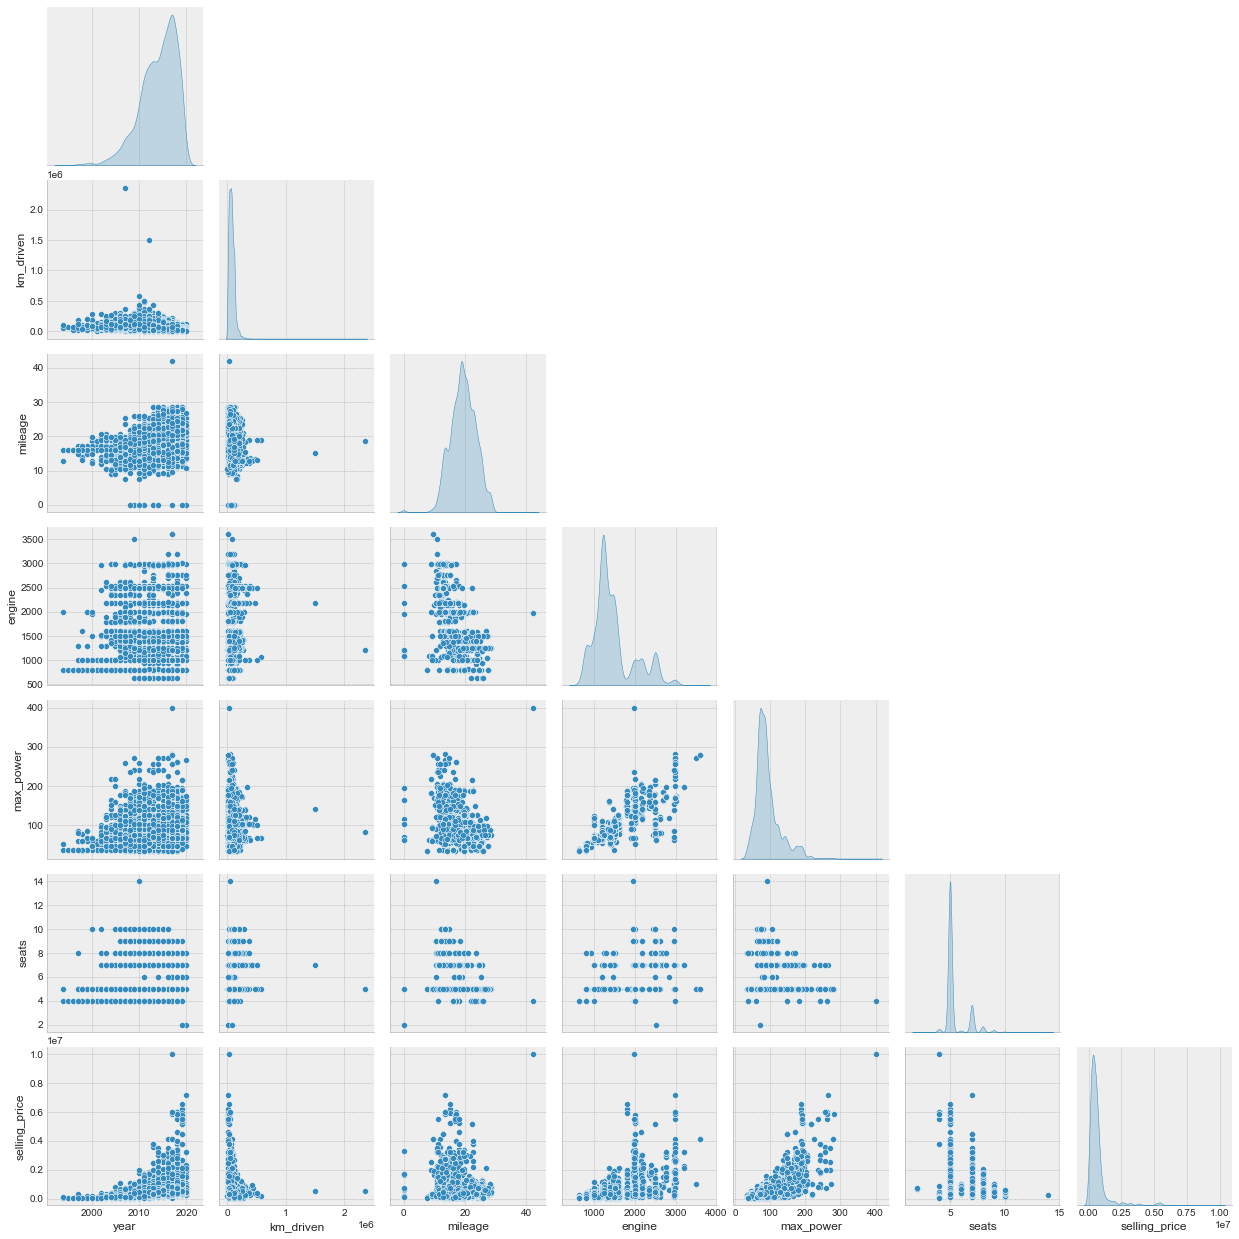

In [35]:
sns.pairplot(df, corner=True, diag_kind='kde');

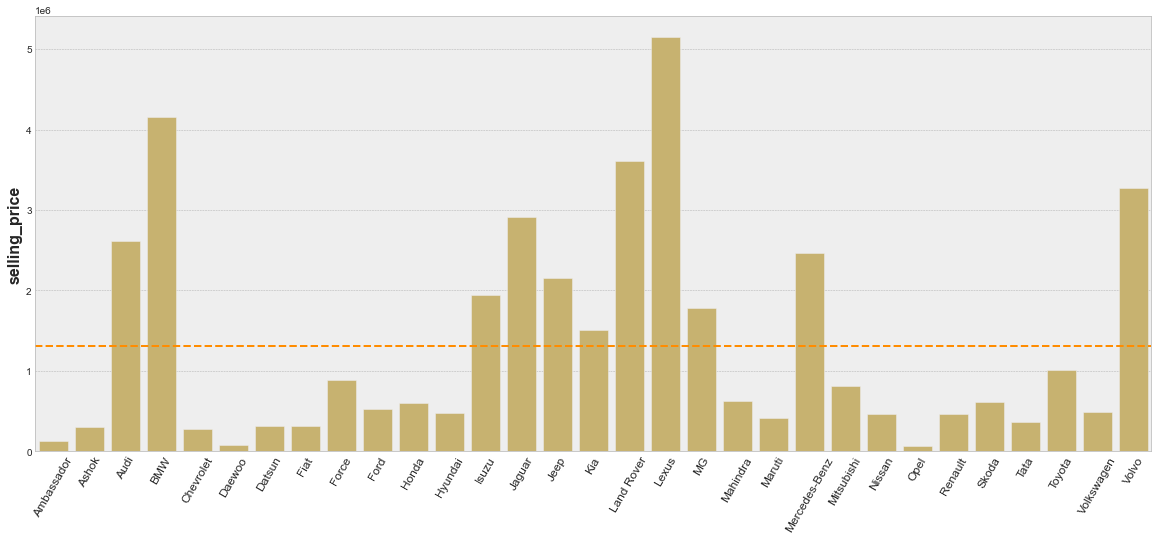

In [36]:
make_price = pd.DataFrame(columns=['cars','selling_price'])
for cars in np.unique(df['cars']):
    make_price.loc[len(make_price),:] = [cars, df.loc[df['cars']==cars,'selling_price'].mean()]
   
fig = plt.figure(figsize=[20,8]);
sns.barplot(data=make_price, y = 'selling_price', x = 'cars', color='#d5b961');
plt.axhline(np.mean(make_price['selling_price']),color='darkorange',linestyle='--',label='mean');
plt.xticks(rotation=60, fontsize = 12);
plt.xlabel('');
plt.ylabel('selling_price', fontsize=16, fontweight='bold');

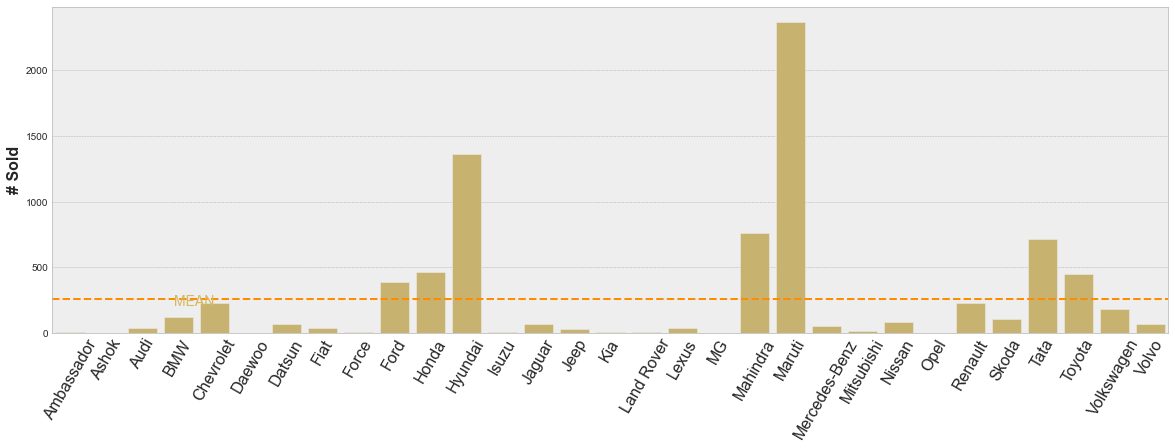

In [37]:
dd1 = np.unique(df['cars'], return_counts=True)
fig = plt.figure(figsize=[20,6]);
sns.barplot(y = dd1[1], x = dd1[0], color='#d5b961');
plt.axhline(np.mean(dd1[1]),color='darkorange',linestyle='--',label='mean');
plt.text(4, 240, 'MEAN', ha='right', va='center', size=14, color='#d5b961');
plt.xticks(rotation=60, fontsize = 16);
plt.xlabel('');
plt.ylabel('# Sold', fontsize=16, fontweight='bold');

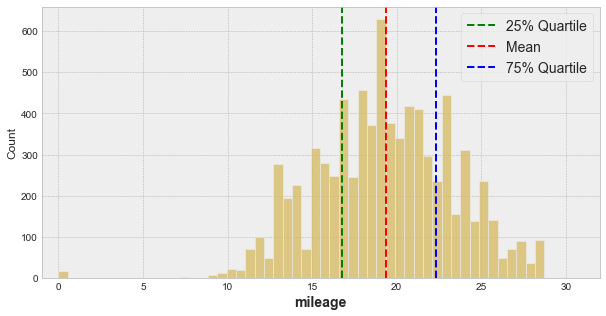

In [38]:
fig = plt.figure(figsize=[10,5]);
sns.histplot(df['mileage'], color='#d5b961');
plt.axvline(df['mileage'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
plt.axvline(df['mileage'].mean(),color='red',linestyle='--',label='Mean');
plt.axvline(df['mileage'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
plt.xlabel('mileage', fontsize=14, fontweight='bold');
plt.legend(fontsize=14);
plt.xlim([-1, 32]);

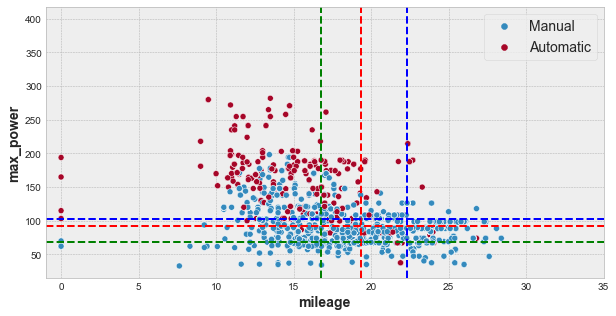

In [39]:
fig = plt.figure(figsize=[10,5]);
sns.scatterplot(data=df, x = 'mileage', y='max_power', hue='transmission');
plt.axvline(df['mileage'].quantile(q=0.25),color='green',linestyle='--');
plt.axvline(df['mileage'].mean(),color='red',linestyle='--');
plt.axvline(df['mileage'].quantile(q=0.75),color='blue',linestyle='--');
plt.axhline(df['max_power'].quantile(q=0.25),color='green',linestyle='--');
plt.axhline(df['max_power'].mean(),color='red',linestyle='--');
plt.axhline(df['max_power'].quantile(q=0.75),color='blue',linestyle='--');
plt.xlabel('mileage', fontsize=14, fontweight='bold');
plt.ylabel('max_power', fontsize=14, fontweight='bold');
plt.legend(fontsize=14);
plt.xlim([-1, 35]);

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

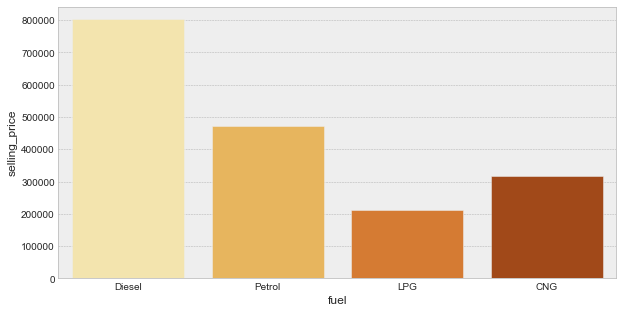

In [40]:
plt.figure(figsize=[10,5])

sns.barplot(x=df['fuel'],y=df['selling_price'],ci=None , palette="YlOrBr")


#### As showing the Diesel higher than other fuel typs

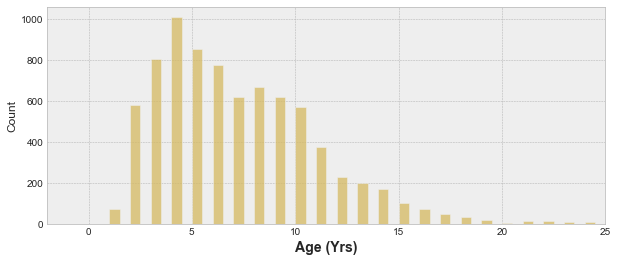

In [41]:
dd1 = pd.DataFrame()
dd1['year']= 2021 - df['year']
fig = plt.figure(figsize=[10,4]);
sns.histplot(dd1['year'],color='#d5b961');
plt.xlabel('Age (Yrs)', fontsize=14, fontweight='bold');
plt.xlim([-2, 25]);

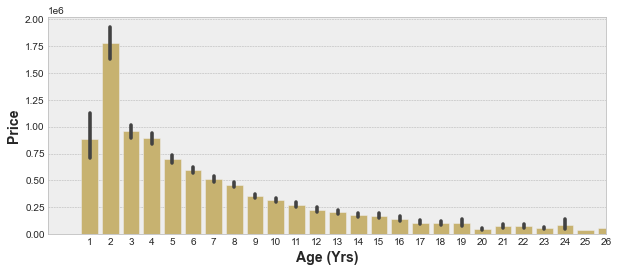

In [42]:
fig = plt.figure(figsize=[10,4]);
sns.barplot(x=dd1['year'], y=df['selling_price'], color='#d5b961');
plt.xlabel('Age (Yrs)', fontsize=14, fontweight='bold');
plt.ylabel('Price', fontsize=14, fontweight='bold');
plt.xlim([-2, 25]);

### As showing the customer prefer to purchase used vehicles that are about 2-5 years old

In [43]:
df.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats', 'cars', 'selling_price'],
      dtype='object')

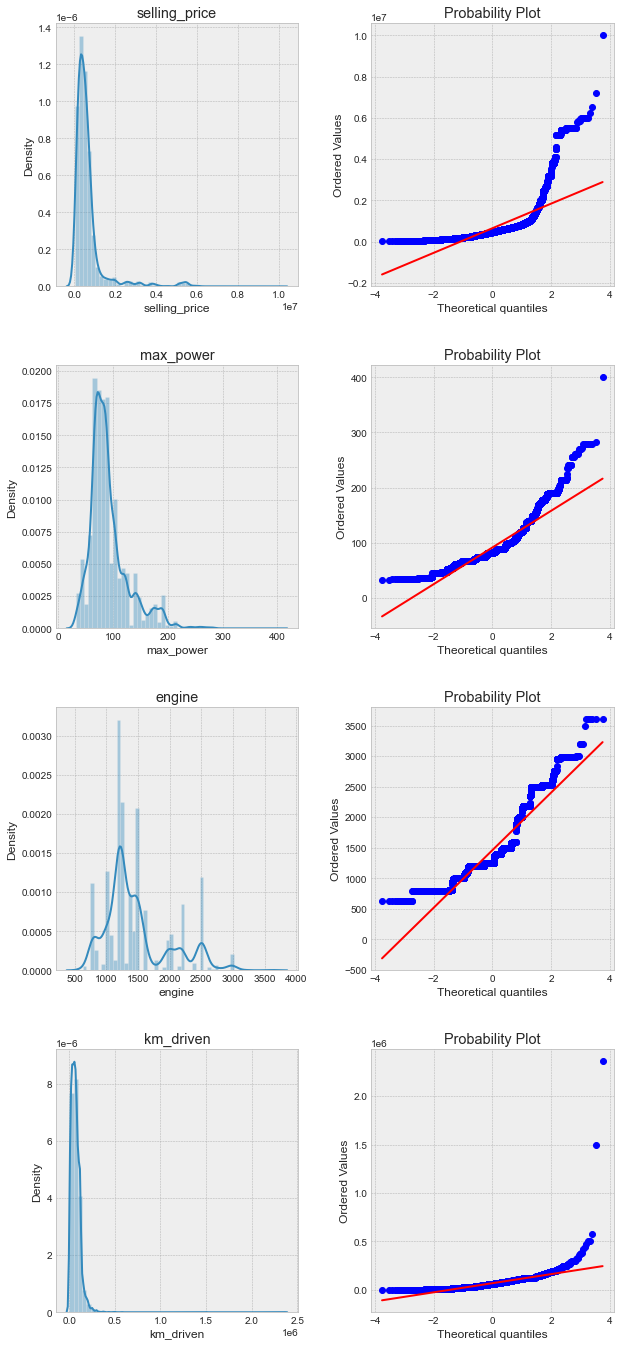

In [44]:
fig = plt.figure(figsize=[10,30]);
grid = plt.GridSpec(5, 2, wspace=0.3, hspace=0.3);
x = ['selling_price', 'max_power', 'engine','km_driven'];

#loop to populate boxplots within subplots
for i, a in enumerate(x):
    exec(f'ax{i}0 = plt.subplot(grid[i,0]);')
    exec(f'sns.distplot(df[a], ax=ax{i}0);')
    exec(f'ax{i}0.set_title(a);')
    exec(f'ax{i}1 = plt.subplot(grid[i,1]);')
    exec(f'stats.probplot(df[a],dist="norm",plot=pylab);')
        
fig.show();

In [45]:
df['selling_price'] = np.log(df['selling_price'])
df['max_power'] = np.log(df['max_power'])
df['engine'] = np.log(df['engine'])
df['km_driven'] = np.sqrt(df['km_driven'])

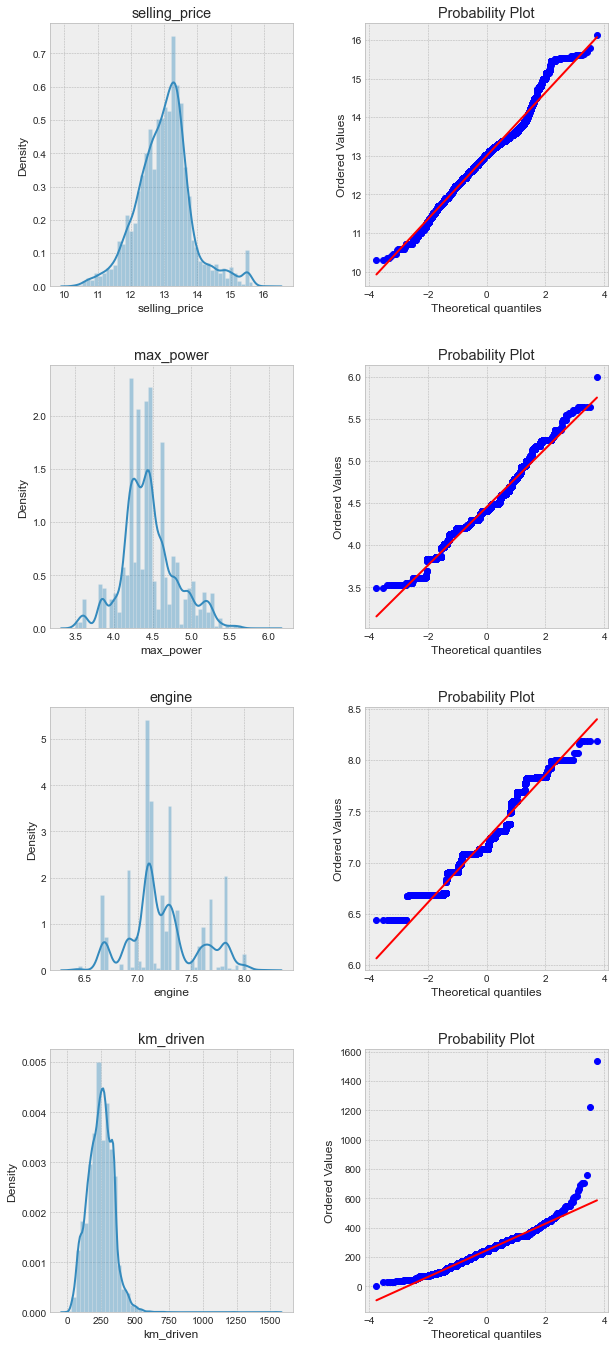

In [46]:
fig = plt.figure(figsize=[10,30]);
grid = plt.GridSpec(5, 2, wspace=0.3, hspace=0.3);
x = ['selling_price', 'max_power', 'engine', 'km_driven'];

for i, a in enumerate(x):
    exec(f'ax{i}0 = plt.subplot(grid[i,0]);')
    exec(f'sns.distplot(df[a], ax=ax{i}0);')
    exec(f'ax{i}0.set_title(a);')
    exec(f'ax{i}1 = plt.subplot(grid[i,1]);')
    exec(f'stats.probplot(df[a],dist="norm",plot=pylab);')
        
fig.show();

#### Now after did ['log'] these are good for the purposes of the linearity assumption

In [47]:
df = pd.get_dummies(df, columns=['fuel', 'transmission', 'owner', 'cars','seller_type'], drop_first=True)

Text(0.5, 1.0, 'Dataset Correlation Matrix')

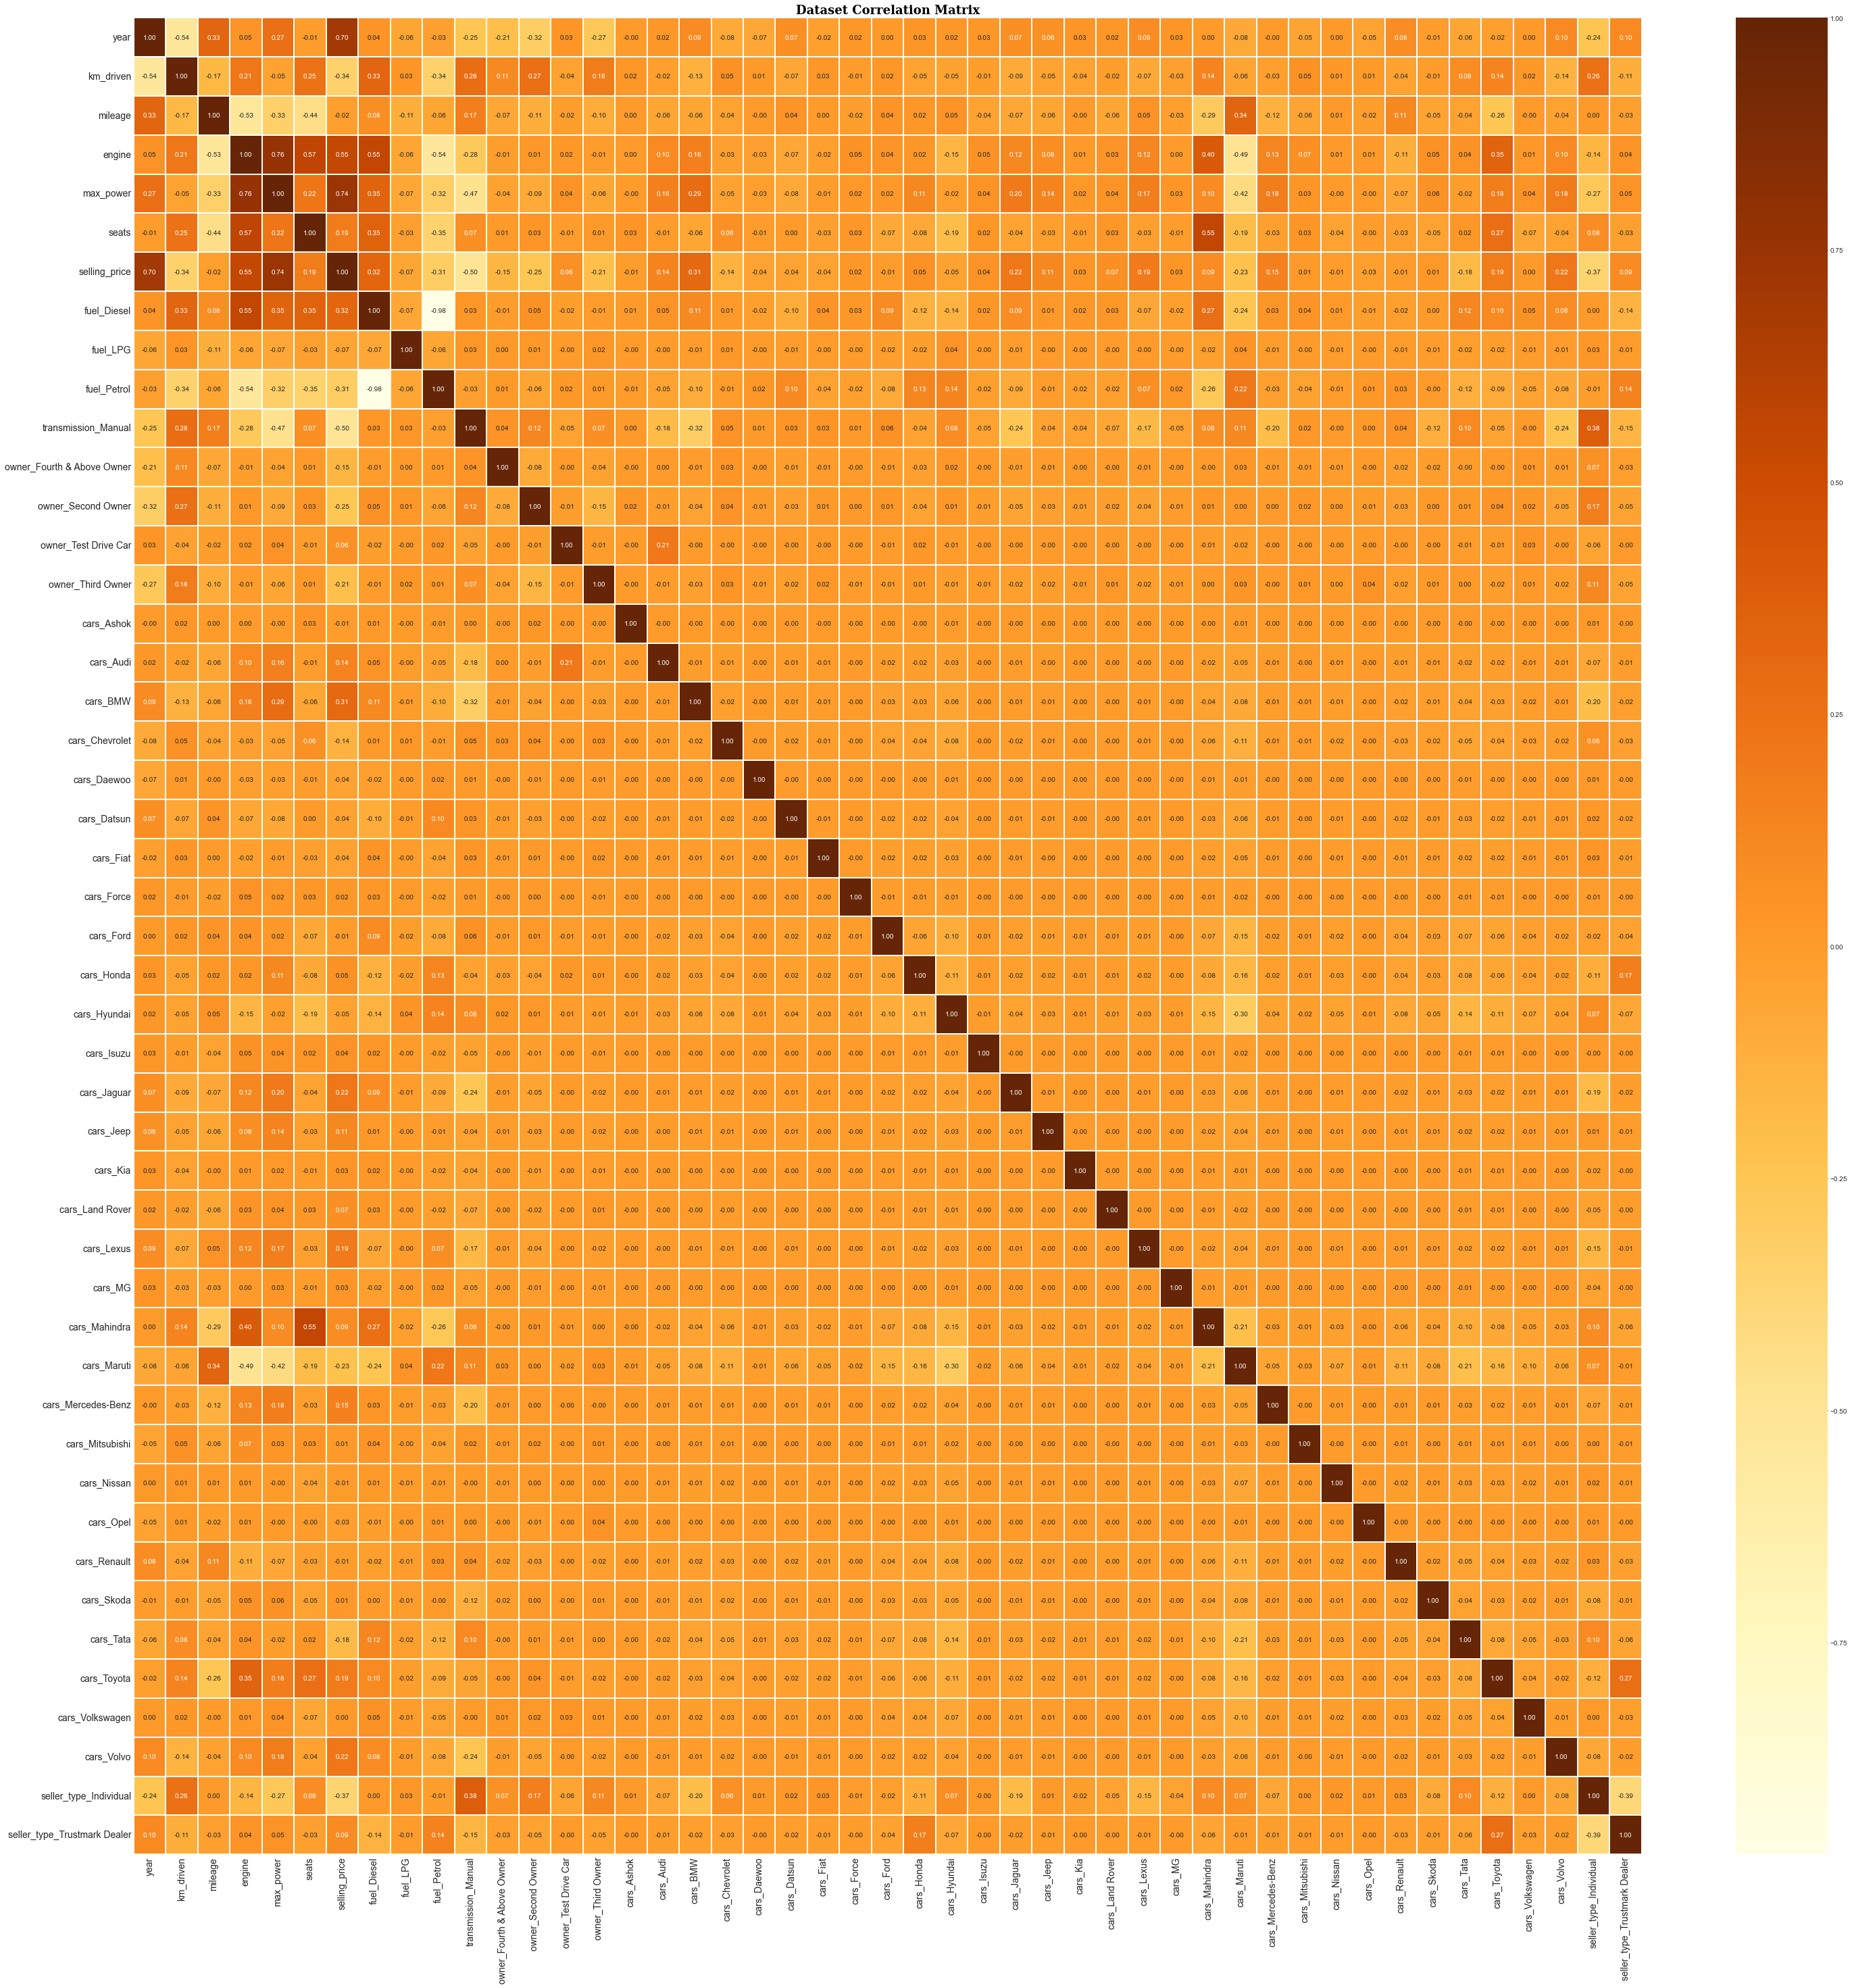

In [48]:
fig, ax = plt.subplots(figsize=[50,50])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="YlOrBr")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict={'family': 'serif', 'color': 'black', 'size': 18, 'weight': 'bold'})


In [49]:
df.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'cars_Ashok', 'cars_Audi', 'cars_BMW', 'cars_Chevrolet', 'cars_Daewoo',
       'cars_Datsun', 'cars_Fiat', 'cars_Force', 'cars_Ford', 'cars_Honda',
       'cars_Hyundai', 'cars_Isuzu', 'cars_Jaguar', 'cars_Jeep', 'cars_Kia',
       'cars_Land Rover', 'cars_Lexus', 'cars_MG', 'cars_Mahindra',
       'cars_Maruti', 'cars_Mercedes-Benz', 'cars_Mitsubishi', 'cars_Nissan',
       'cars_Opel', 'cars_Renault', 'cars_Skoda', 'cars_Tata', 'cars_Toyota',
       'cars_Volkswagen', 'cars_Volvo', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')

### split the data to test & train

In [50]:

X = df.drop(['selling_price'], axis=1)
y = df[['selling_price']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5534, 46) (2372, 46) (5534, 1) (2372, 1)


### Model 

In [51]:
from sklearn.linear_model import LinearRegression



lr = LinearRegression()
model = lr.fit(X=X, y = y)

pred = lr.predict(X_test)

round(model.score(X=X, y = y)* 100 )

92

In [52]:
X_test = X_test[X_train.columns]
X_test.head()

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,...,cars_Nissan,cars_Opel,cars_Renault,cars_Skoda,cars_Tata,cars_Toyota,cars_Volkswagen,cars_Volvo,seller_type_Individual,seller_type_Trustmark Dealer
2990,2019,158.113883,23.84,7.089243,4.430817,5.0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
607,2016,244.948974,19.09,7.247793,4.234251,5.0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6782,2004,520.576603,16.80,7.247793,4.127134,5.0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2042,2019,89.442719,18.90,7.087574,4.405010,5.0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3941,2016,244.948974,25.44,6.841615,4.030695,5.0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [53]:
mean_absolute_error(y_test, pred)

0.17703700421245197

In [54]:
np.sqrt(mean_squared_error(y_test, pred)**0.5)

0.48211050521290055

In [55]:
r2_score(y_test, pred)

0.9233933819840345

#### The observation
R-squared on the test data is above 92%, indicating a very good result in the applciation of the model.

### Conclusion and Recommendations for Business
Analysis of trends in used car vehicle sales indicates that:

1) Maruti, Hyundai, Honda, Toyota, Ford, Mahindra and Tata are sold in higher volume than other vehicle makes, and the prefferred    makes are lower in price.

2) The Price (lower rather than higher) is a significantly factor in customer purchasing decisions.

3) The customers prefer vehicles with mileage between 15-25 kmpl.

4) The customers overwhelmingly prefer manual transmissions over automatic.

5) The customers tend to purchase used vehicles 2 -5 years old.


##### Based upon the above observations, it is recommended that focuses its inventory to match such preferences. Since the higher in demand makes are lower in price than other makes, focusing on stocking these makes will result in less flooring, reducing capital investments.


##### The model that has been provided in this analysis is a 92% accurate pricing model for determining what customers would be willing to pay for a used vehicle based up the vehicles characteristics. It has been shown that the model is reliable, meeting the assumptions for linear regression and demonstrating a low error rate.